Preparando a base de dados 

In [2]:
import pandas as pd

produtos_df = pd.read_csv(r"Contoso - Cadastro Produtos.csv", sep=';', encoding='latin1')
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', encoding='latin1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', encoding='latin1')

produtos_df = produtos_df.rename(columns={'ÿNome do Produto':'Nome do Produto'})
clientes_df = clientes_df.rename(columns={'ÿID Cliente':'ID Cliente'})
lojas_df = lojas_df.rename(columns={'ÿID Loja':'ID Loja'})

Simplificando para o Merge

In [3]:
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

Visualização teste

In [4]:
#display(produtos_df)
#display(clientes_df)
#display(lojas_df)

Mesclando os dataframes

In [5]:
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail':'E-mail do Cliente'})
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,E-mail do Cliente,Nome da Loja
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,rbrumfieldmy@ameblo.jp,Loja Contoso Austin
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,cshawd4@technorati.com,Loja Contoso North America Reseller
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",kgorriekd@bandcamp.com,Loja Contoso Tehran No.2
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,angela49@adventure-works.com,Loja Contoso Singapore
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,jacob4@adventure-works.com,Loja Contoso Grand Prairie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,ocrosson9u@illinois.edu,Loja Contoso Ridgely
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,victor11@adventure-works.com,Loja Contoso Milliken
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,mtopaz4@gmpg.org,Loja Contoso Cheshire
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,lance5@adventure-works.com,Loja Contoso East Troy


Qual cliente comprou mais vezes?   

    - Usarei o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
    - E o método plot() para exibir um gráfico

In [8]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes)

E-mail do Cliente
karen33@adventure-works.com    77
chloe77@adventure-works.com    74
julia43@adventure-works.com    69
josé64@adventure-works.com     68
karen16@adventure-works.com    68
                               ..
hcadwalladergx@slashdot.org     1
ian86@adventure-works.com       1
cvernazza4k@wordpress.com       1
rpeadena0@delicious.com         1
ppitman73@goodreads.com         1
Name: count, Length: 38907, dtype: int64

Mostrando em gráfico

<Axes: xlabel='E-mail do Cliente'>

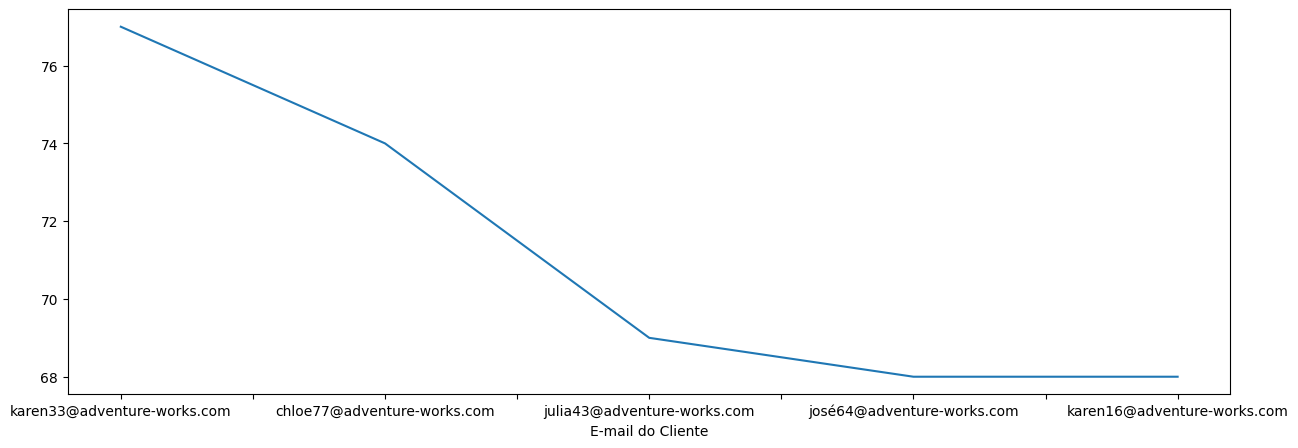

In [10]:
#frequencia_clientes.plot() -> irá mostrar os 38mil intens no gráfico, o que não fica visualmente agradável
frequencia_clientes[:5].plot(figsize=(15, 5)) #irá mostrar os 5 primeiros itens ; figsize -> ajusta o tamanho do gráfico